<a href="https://colab.research.google.com/github/drcrajc/computernetworks/blob/main/Exp1_network_topology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install networkx matplotlib

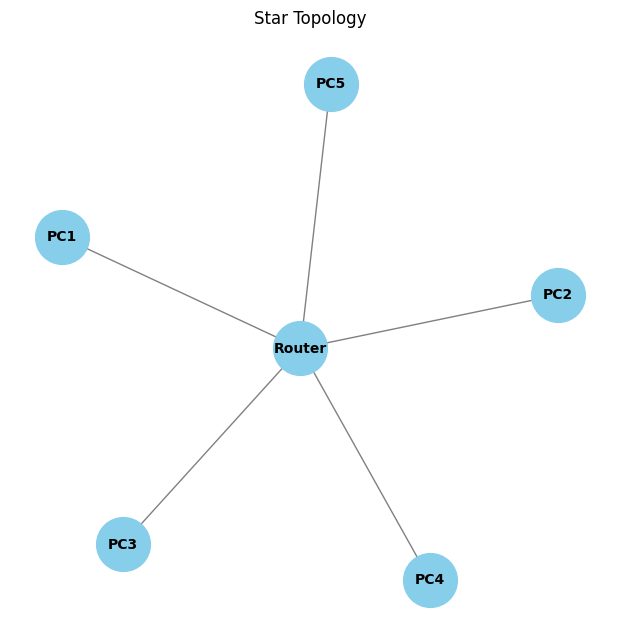

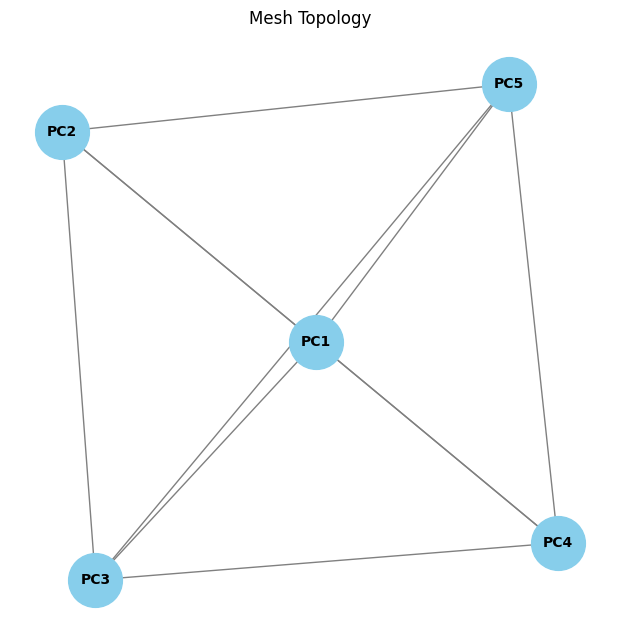

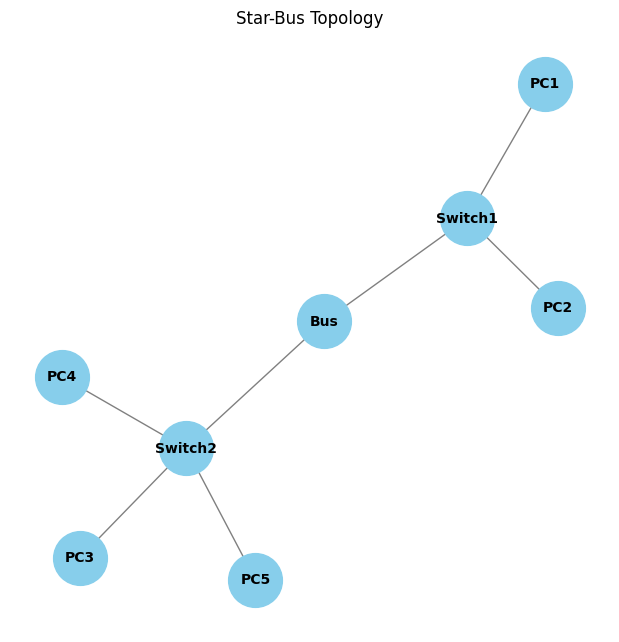

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

class NetworkGraph:
    def __init__(self, topology):
        self.topology = topology
        self.graph = nx.Graph()

    def create_star_topology(self, central_device, devices):
        """Create a star topology where all devices connect to a central hub."""
        self.graph.add_node(central_device)
        for device in devices:
            self.graph.add_node(device)
            self.graph.add_edge(central_device, device)

    def create_mesh_topology(self, devices):
        """Create a fully connected mesh topology."""
        for i in range(len(devices)):
            for j in range(i + 1, len(devices)):
                self.graph.add_edge(devices[i], devices[j])

    def create_star_bus_topology(self, central_devices, device_groups):
        """Create a Star-Bus topology with multiple hubs connected via a backbone bus."""
        self.graph.add_node("Bus")
        for hub, devices in zip(central_devices, device_groups):
            self.graph.add_edge("Bus", hub)
            for device in devices:
                self.graph.add_edge(hub, device)

    def draw_network(self):
        """Draw and display the network topology using NetworkX and Matplotlib."""
        plt.figure(figsize=(6, 6))
        pos = nx.spring_layout(self.graph)  # Automatic positioning of nodes
        nx.draw(self.graph, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=1500, font_size=10, font_weight="bold")
        plt.title(f"{self.topology} Topology")
        plt.show()


# **Simulating Different Topologies**
devices = ["PC1", "PC2", "PC3", "PC4", "PC5"]

# **Star Topology Visualization**
star_network = NetworkGraph("Star")
star_network.create_star_topology("Router", devices)
star_network.draw_network()

# **Mesh Topology Visualization**
mesh_network = NetworkGraph("Mesh")
mesh_network.create_mesh_topology(devices)
mesh_network.draw_network()

# **Star-Bus Topology Visualization**
star_bus_network = NetworkGraph("Star-Bus")
central_hubs = ["Switch1", "Switch2"]
device_groups = [["PC1", "PC2"], ["PC3", "PC4", "PC5"]]
star_bus_network.create_star_bus_topology(central_hubs, device_groups)
star_bus_network.draw_network()
